In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Desviación estándar
# Conjunto ficticio con distribución normal, notar la 'n' al final
np.random.seed(0)
data = np.random.randn(50000) * 20 + 20
data

array([55.28104692, 28.00314417, 39.57475968, ..., 14.99316466,
       31.69455975, -5.01653927], shape=(50000,))

In [6]:
# Anomalías con std
corte = 3
std = np.std(data)
media = np.mean(data)
anom = data[(data < media-corte*std) | (data > media+corte*std)]
len(anom)

148

In [7]:
# Prueba de normalidad: histograma, Quantile-quantile graph, Shapiro
# Conjunto de datos ficticio normal
np.random.seed(42)
data = np.random.normal(0,1,100)

(array([ 1.,  4.,  6.,  8., 19., 17., 21., 11.,  6.,  7.]),
 array([-2.6197451 , -2.17254278, -1.72534045, -1.27813812, -0.83093579,
        -0.38373346,  0.06346887,  0.5106712 ,  0.95787353,  1.40507586,
         1.85227818]),
 <BarContainer object of 10 artists>)

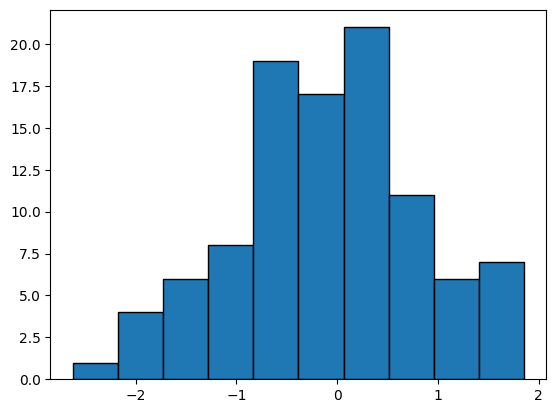

In [8]:
# 1. Histograma
plt.hist(data, edgecolor='black', linewidth=1)

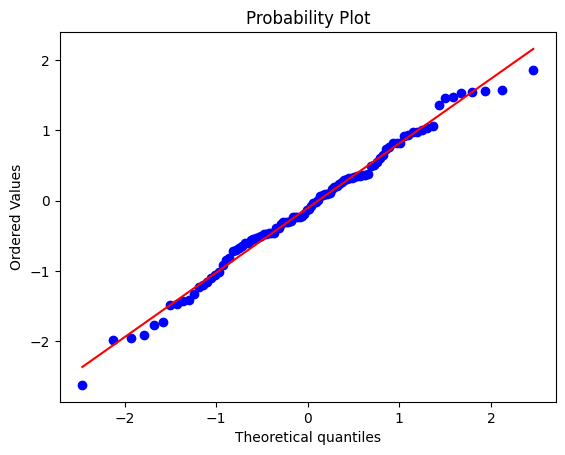

In [9]:
# 2. gráfica de cuantiles
import pylab
import scipy.stats as stats
stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

In [10]:
# 3. Prueba de Shapiro
from scipy.stats import shapiro
estad, p_value = shapiro(data)
print('p_value = ',p_value)
# p_value > 0.05 => distribución normal

p_value =  0.6551676754214818


In [11]:
# Conjunto de datos real
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


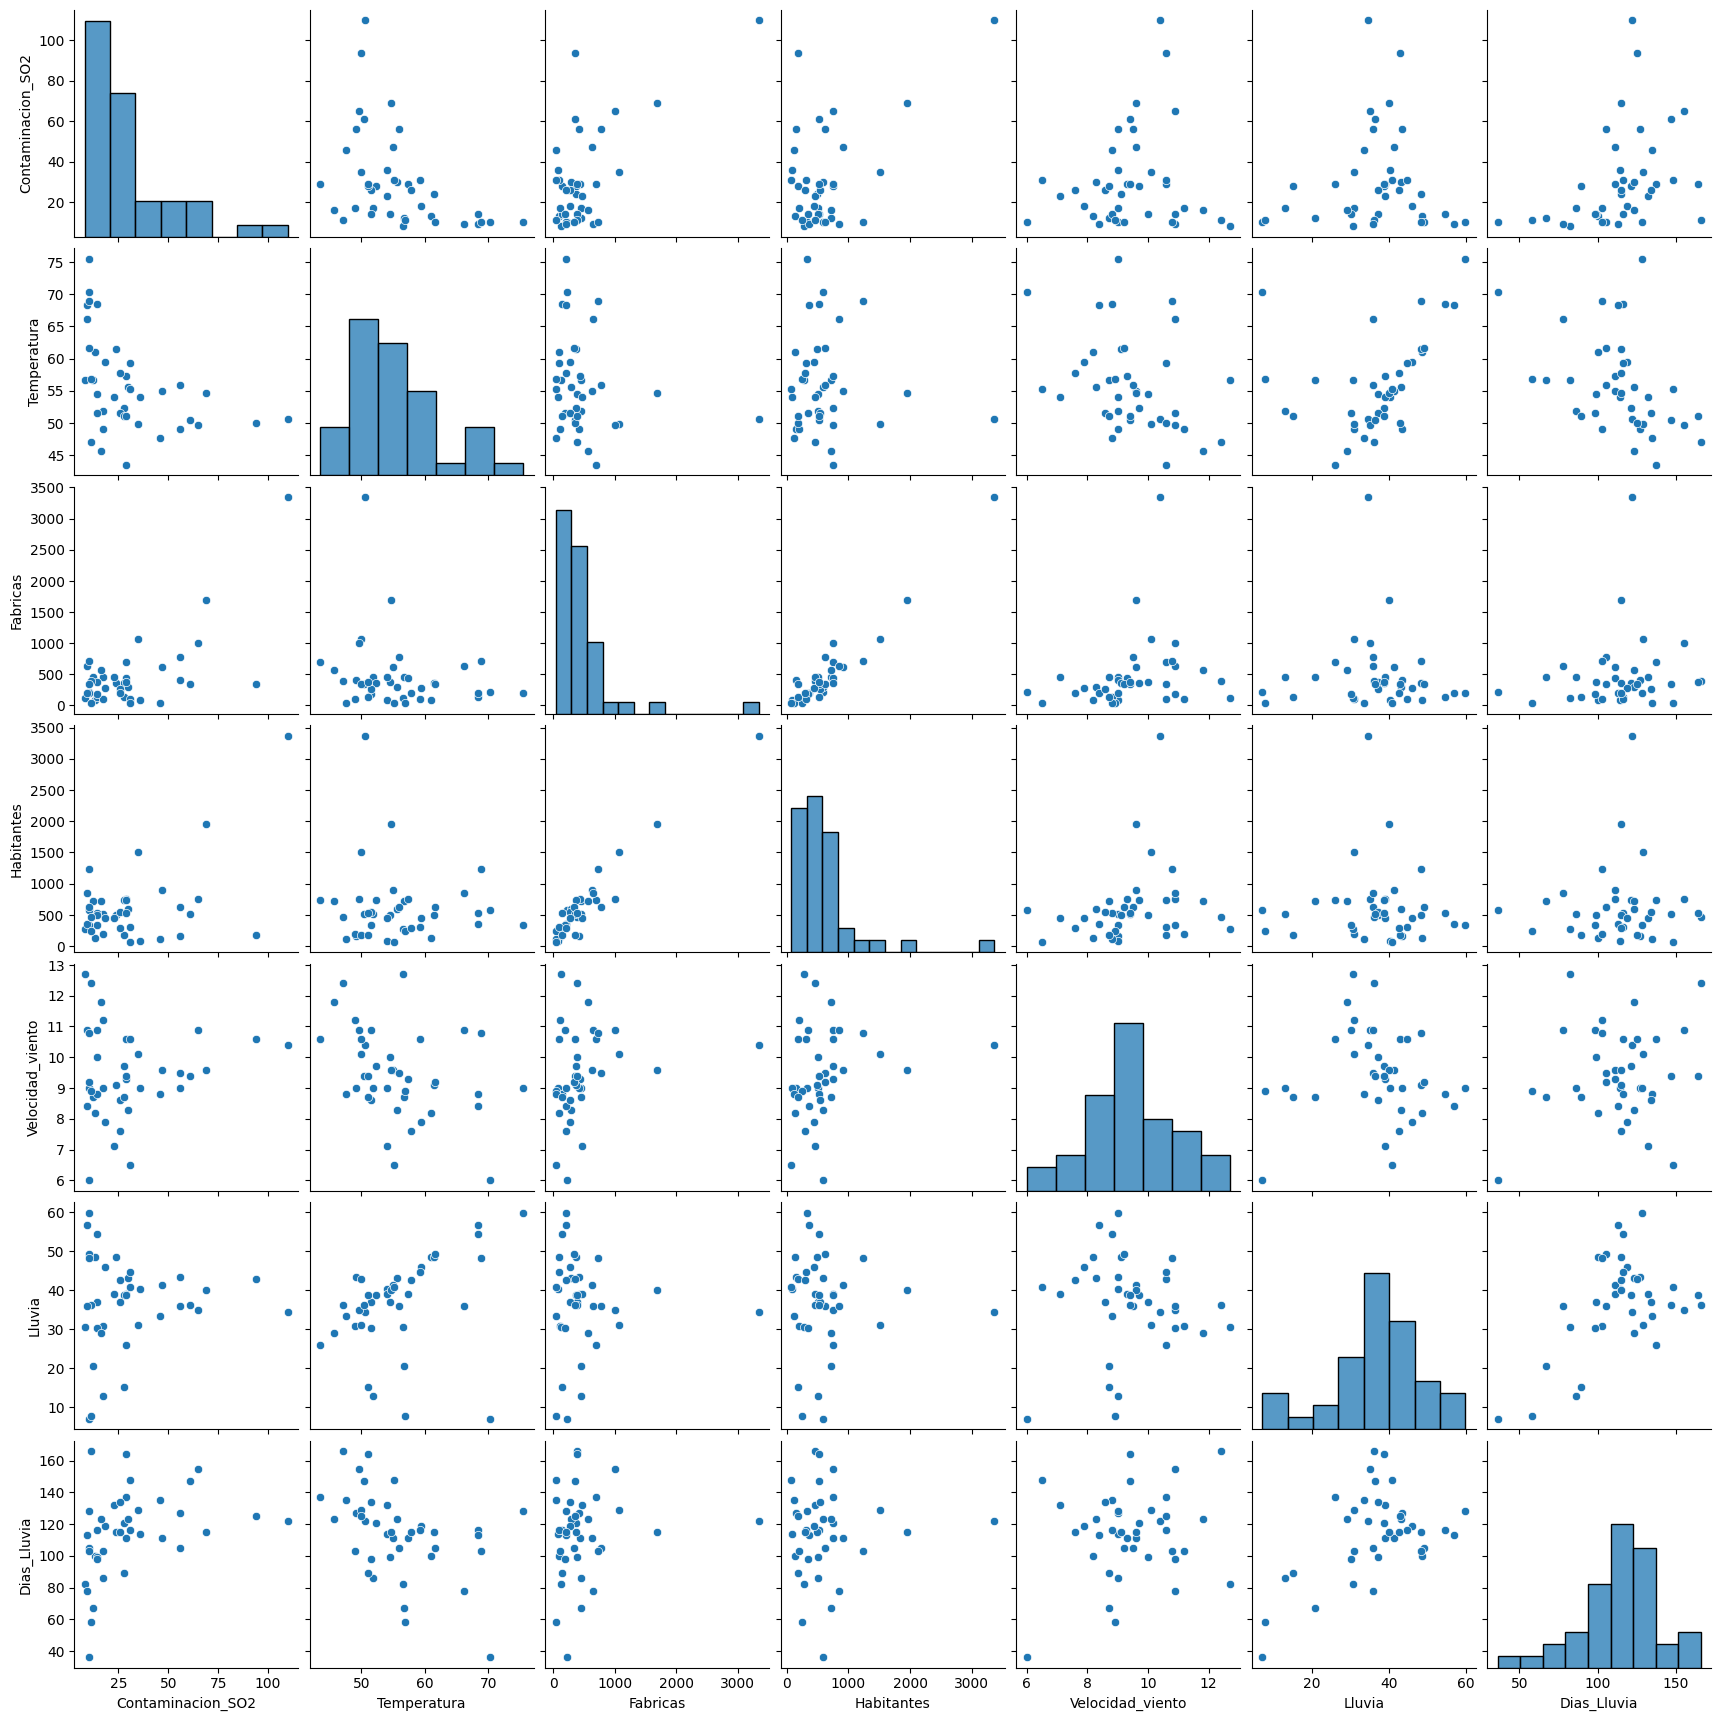

In [12]:
import seaborn as sns
sns.pairplot(cont)

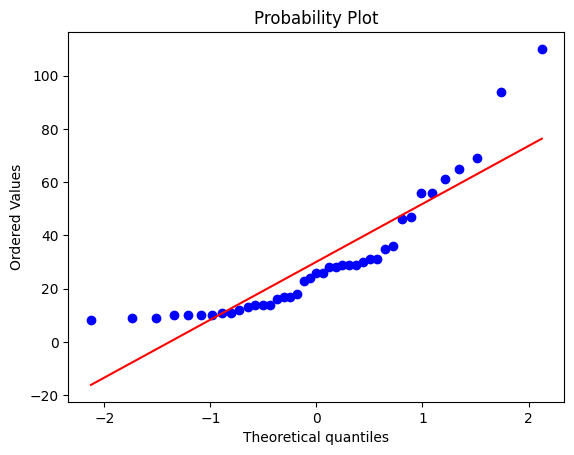

In [13]:
# Contaminación_SO2
# Quartiles
stats.probplot(cont.Contaminacion_SO2, dist='norm', plot=pylab)
pylab.show()

In [14]:
# Shapiro
estad, p_value = shapiro(cont.Contaminacion_SO2)
print('p_value = ', p_value)

p_value =  9.723376400158156e-06


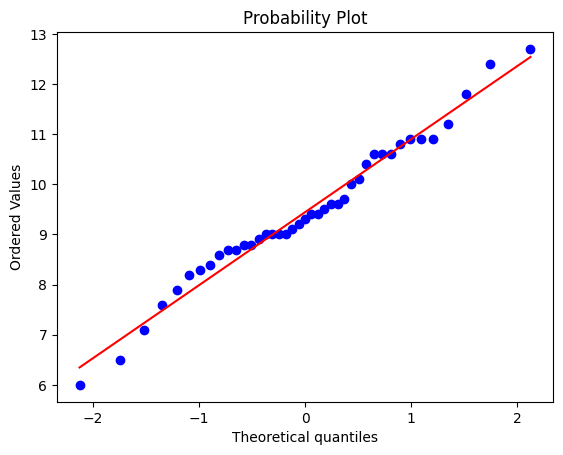

In [15]:
# Velocidad_viento
stats.probplot(cont.Velocidad_viento, dist='norm', plot=pylab)
pylab.show()

In [16]:
# Shapiro
estad, p_value = shapiro(cont.Velocidad_viento)
print('p_value = ', p_value)

p_value =  0.6972579783041465


In [33]:
# Diagrama de bigotes para datos con distribución normal
data = np.random.randn(50000) * 20 + 20
data = pd.DataFrame(data, columns=['random'])
data.head(2)

,random
0,-14.228062
1,-11.104849


<Axes: >

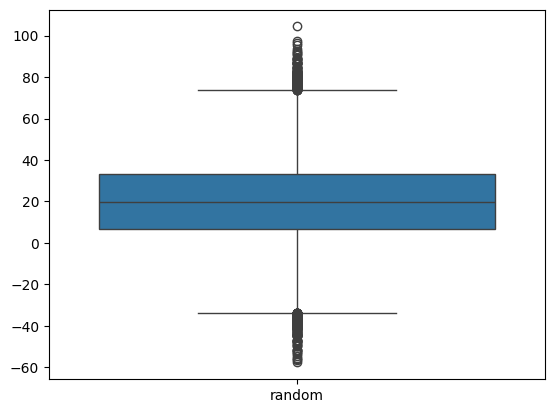

In [28]:
import seaborn as sns
sns.boxplot(data)

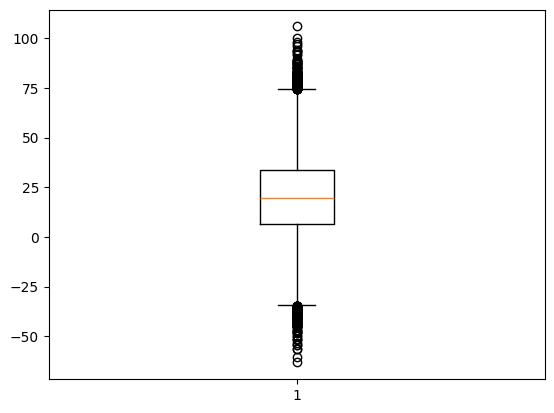

In [34]:
bp = plt.boxplot(x=data)

In [35]:
bp['fliers'][0].get_data()[1].shape

(350,)

In [39]:
stocks = pd.read_csv('stocks.csv', header='infer')
stocks.index = stocks.Date
stocks.drop(['Date'],axis=1, inplace=True)
stocks

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000
...,...,...,...
12/23/2016,63.240002,12.46,22.600000
12/27/2016,63.279999,12.39,22.610001
12/28/2016,62.990002,12.25,22.330000


<Axes: xlabel='BAC', ylabel='Count'>

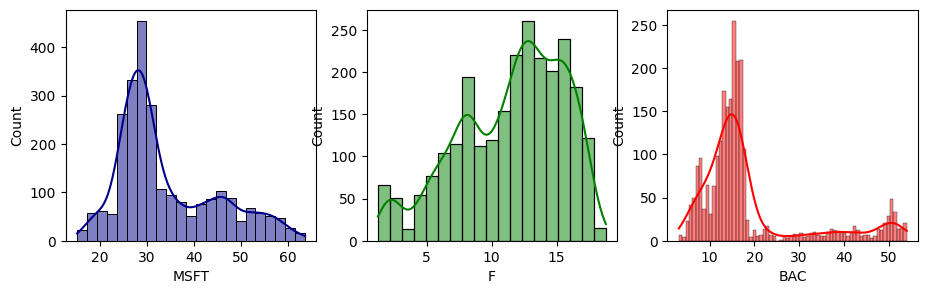

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.histplot(stocks.MSFT, ax=ax[0], color="darkblue", kde=True)
sns.histplot(stocks.F, ax=ax[1], color='green', kde=True)
sns.histplot(stocks.BAC, ax=ax[2], color='red', kde=True)

<Axes: >

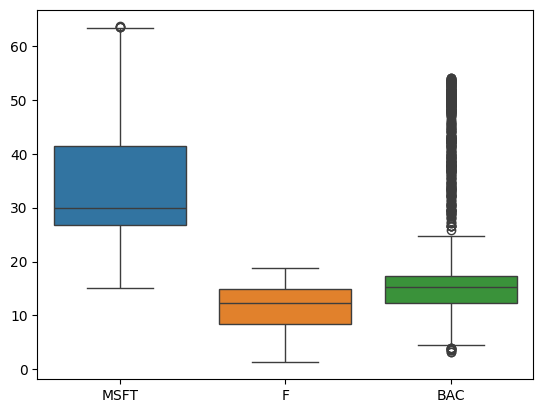

In [42]:
sns.boxplot(data=stocks)

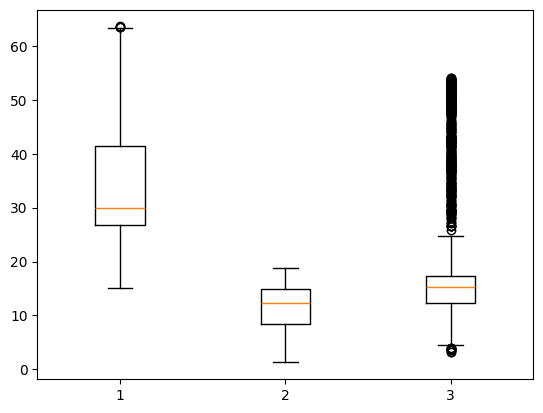

In [46]:
bp = plt.boxplot(x=stocks)

In [47]:
bp['fliers'][0].get_data()[1].shape

(4,)

In [48]:
bp['fliers'][1].get_data()[1].shape

(0,)

In [49]:
bp['fliers'][2].get_data()[1].shape

(441,)

In [50]:
# Obtener los atípicos con IQR
np.random.seed(0)
data = np.random.randn(50000) * 20 + 20

In [68]:
Q1, Q3 = np.percentile(data, [25, 75])
IQR = Q3-Q1
# bigotes (whiskers)
sup = Q3 + IQR*1.5
inf = Q1 - IQR*1.5
# anomalías
anom_ind = np.where((data < inf)|(data > sup))  
anom = data[anom_ind]   
len(anom_ind[0]), len(anom)

(379, 379)

In [67]:
print(anom_ind)
print(inf, sup, Q1)
print(data[1419])

(array([  271,   427,   494,   589,   685,   943,  1054,  1256,  1418,
        1446,  1488,  2018,  2060,  2114,  2360,  3020,  3082,  3118,
        3184,  3230,  3447,  3462,  3545,  3679,  3752,  4337,  4443,
        4469,  4909,  5473,  5656,  5959,  6080,  6307,  6456,  6569,
        6580,  6727,  6788,  6830,  7242,  7282,  7350,  7387,  7410,
        7421,  7432,  7580,  7756,  7798,  8122,  8373,  8457,  8781,
        9006,  9065,  9067,  9194,  9350,  9849,  9901, 10024, 10241,
       10728, 10752, 10766, 10855, 11048, 11193, 11281, 11487, 11542,
       11686, 11924, 11968, 12066, 12111, 12218, 12254, 12387, 12391,
       12818, 12869, 12876, 12939, 12987, 12999, 13033, 13119, 13164,
       13294, 13600, 13723, 13815, 13858, 14030, 14049, 14148, 14153,
       14288, 15019, 15212, 15561, 15594, 15741, 15890, 16155, 16308,
       16362, 16548, 16787, 16957, 17043, 17305, 17349, 17425, 17905,
       17992, 18489, 18639, 18812, 18957, 19045, 19108, 19165, 19253,
       19451, 19462

In [110]:
# EllipticEnvelope:
# Basado en covarianza, genera una elipse que "envuelve" los datos "normales"
# y deja fuera losa típicos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
cov = np.array([[.7, .5],
                [.5, .5]])
X = np.random.RandomState(0).multivariate_normal(mean=[-8,8],cov=cov,size=500)




ee = EllipticEnvelope(random_state=42)
ee.fit(X)
# predict regresa 1 para valores normales y -1 para atípicos
anom = ee.predict(X)
# ee.covariance_, ee.location_

print(anom.shape)

(500,)


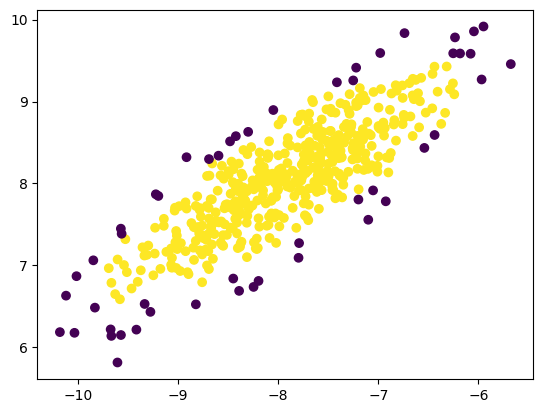

In [ ]:
plt.scatter(X[:,0],X[:,1],c=anom)

In [ ]:
# Funciona para datos con múltiples dimensiones